# Om Sakthi...Guruvadi Saranam!...Thiruvadi Saranam!
# மக்கள் நல பணி 2024

# Introduction
This notebook is designed to automate the process of generating labels for various items based on data provided in an Excel file. It utilizes the `pandas` library to read and manipulate the data, the `reportlab` library to generate PDF files for the labels, and `regex` for pattern matching. The main purpose of this notebook is to streamline the process of creating labels for different items such as articles, district badges, public badges, institute badges, balance articles to district, and seating labels for projects.


Please navigate to this browser page `https://jupyter.org/try` and click on `JupyterLab`. You will see something similar to this below. on the left side, there is a upload option of load the file and data. click on it and upload this file and all other files required.

once uploaded double click to open the file. Once this file gets opened. Click on thr play button to run this codes cell by cell. this will return an error "File not found" , as the file path will change. please upload the respective file and copy paste the path wherever needed.

Follow instructions moving forward to understand the Procedure.


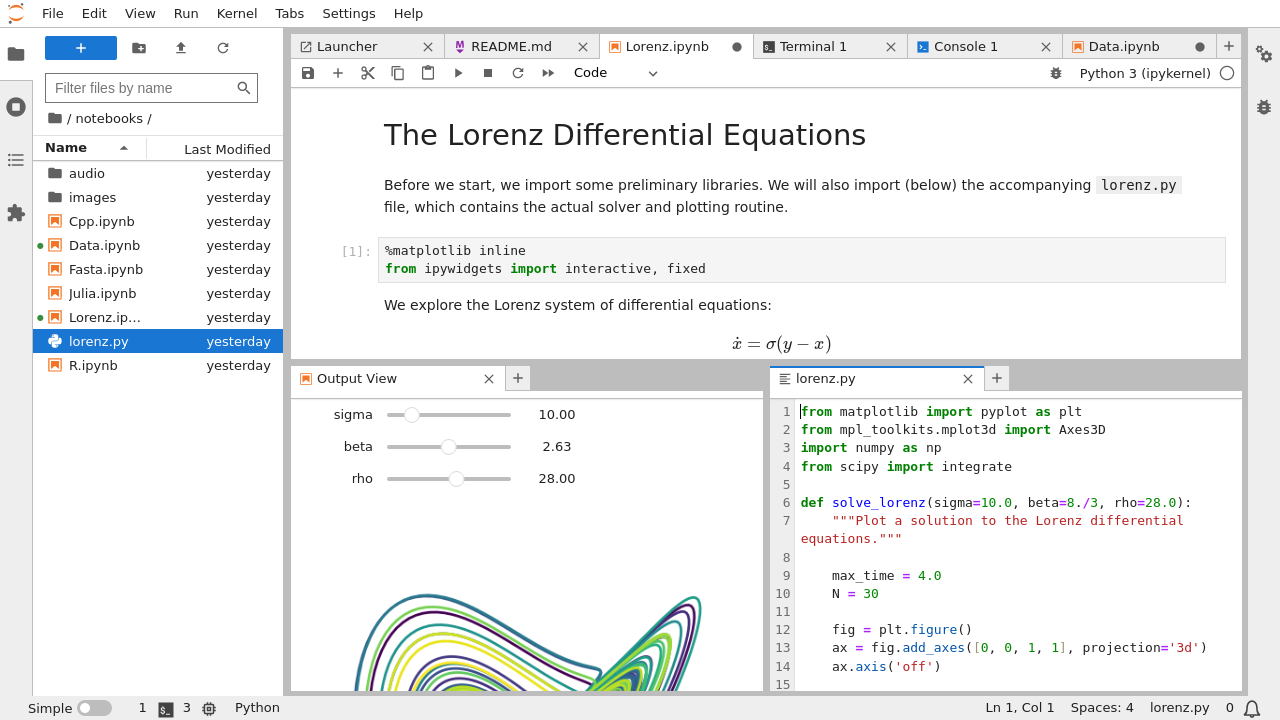

In [161]:
from IPython import display
display.Image("https://jupyterlab.readthedocs.io/en/4.0.x/_images/jupyterlab.png")

# Instructions

#### 1. **Installs Required packages**: This section installs the necessary packages (`pandas`, `reportlab`, `regex`). After running this section, make sure to comment out the installation commands to avoid reinstallation.

In [136]:
# !pip install pandas
# !pip install reportlab
# !pip install regex

# please add # (hash) before each line after it ran. otherwise, the packages will reinstall again

#### 2. **Import required packages**: Imports all the required Python libraries.

In [137]:
import warnings
from reportlab.lib.pagesizes import portrait, A4
from reportlab.lib.units import mm
from reportlab.pdfgen import canvas
from reportlab.lib.styles import ParagraphStyle
from reportlab.platypus import Paragraph
import re
import pandas as pd
warnings.filterwarnings('ignore')

#### 3. **Input the name of the file along with the file path in the computer**: Specifies the file path and sheet name of the input Excel file. Add the path along with the file name within double quotes " ". `master_file_path` is the path for Master file and `sheet_name` is the name of the sheet where we have the data on master file. PLease change the file path accordingly to your system.


In [138]:
master_file_path = "/Users/aswathshakthi/PycharmProjects/MNP24/Label/data/MNP Master Data Filter 2024-V4-01032024.xlsx"
sheet_name = "Total MNP-Master Data Token"

#### 4. **Reads the Master data file**: The input Excel file is read, and the data is sorted in the order of `Sequence list`, `D /P /I`, and `District Name` in ascending order. This sorting facilitates the generation of tokens in sequence order for articles and ensures that district names are arranged in ascending order within each sequence number.This also makes sure that `Public` and `Institution` names comes in the bottom of order. Additionally, `Panchayat` entries are removed from the data as tokening for them is not required.


In [139]:
data = pd.read_excel(master_file_path,sheet_name=sheet_name).sort_values(by=["Sequence list","D /P / I","DISTRICT / NAME"],ascending=True,ignore_index=True)
data = data[data["D /P / I"]!="Panchyat"]
data

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY
0,1,District,Project,Tirunelveli,Project Tirunelveli,11,1,75
1,2,District,Project,Tuticurion,Project Tuticurion,11,1,57
2,3,District,Project,Chittor - Urban,Project Chittor - Urban,2,2,2
3,4,District,Project,Karnataka,Project Karnataka,2,3,2
4,5,District,Project,Erode,Project Erode,1,4,1
...,...,...,...,...,...,...,...,...
446,440,Public,Article,P 120 - A.Muniammal,Girls Cycle,1,118,1
447,441,Public,Article,P 122 - A.keerthana,Girls Cycle,1,118,1
448,442,Public,Article,P 123 - P.Uma,Girls Cycle,1,118,1
449,443,Public,Article,P 165 - Abimeena U,Girls Cycle,1,118,1


#### 5. **Validate Data entries**: Check if any Human error persists in the data by cross checking data. We Inspect for any errors in the data by,
    5.1. Inspect if any `DISTRICT / NAME` , `REQUESTED ARTICLE`, has duplicates or misspelled more than once.
    5.2. Checking if each `Sequence list` is associated with one `REQUESTED ARTICLE` and vice versa.
    5.3. Check if any `Sequence list` is missing.
    5.4. Remove duplicated Rows.

##### 5.1. Visually inspect any duplicates in District / NAME

In [140]:
data["DISTRICT / NAME"].unique()

array(['Tirunelveli', 'Tuticurion', 'Chittor - Urban', 'Karnataka',
       'Erode', 'Tiruchi', 'I 008-Anbu Thondu Illam', 'Krishnagiri North',
       'Kerala -b.Palaghat', 'Ariyalur', 'Chittor - Rural', 'Madurai',
       'Tanjavur', 'Ramnad', 'Theni', 'Virudhu nagar', 'Puducherry',
       'Villupuram', 'I 009-MASM', 'Chennai South', 'P 079 - K.Eswaraan',
       'P 097 - R.Dhanasekaran', 'Coimbatore', 'P 048 - Senthilkumar',
       'P 057 - Lalitha', 'Salem', 'Cuddalore', 'Dindugal',
       'Krishnagiri South', 'Namakkal', 'P 060 - R.Saravanan',
       'P 135 - M.Kumar', 'Chennai North', 'Chennai central',
       'Dharmapuri', 'Mumbai', 'Tiruvallur', 'Vellore - west',
       'Vellore -East', 'Vellore -North', 'Vellore -South',
       'I007 - Adhiparasakthi Inst', 'P 027 - P Jayasree',
       'P 030 - S.ShanmugaSundaram', 'P 063 - S.Periyasamy. ',
       'P 066 - R.Kannan', 'P 069 - E.Krishnan', 'P 070 - Kumar',
       'P 076 - C.Sreela', 'P 080 - M.Satheesh', 'P 105 - K.Pavithra',
     

##### 5.1. visually inspect any duplicates in REQUESTED ARTICLE

In [141]:
data["REQUESTED ARTICLE"].unique()

array(['Project Tirunelveli', 'Project Tuticurion',
       'Project Chittor - Urban', 'Project Karnataka', 'Project Erode',
       'Project Tiruchi', 'Project 1000 Kg Rice',
       'Project Krishnagiri North', 'Project Kerala', 'Project Ariyalur',
       'Project Chittor - Rural', 'Project Madurai', 'Project Tanjavur',
       'Project Ramnad', 'Project Theni', 'Project Virudhu nagar',
       'Project Puducherry', 'Handicapped Hand Tricycle',
       'Fixed Wheel chair', 'Wheelchair', 'Handicapped Scooter',
       'Two wheeler', 'Weed cutting Machine', 'Tree cutting machine',
       'Lenova Tab', 'Laptop', 'Desktop Computer', 'Canon (Xerox)',
       'Colour Printer', 'HP Laser Printer 126 A', 'Printer HP 1108',
       'Hearing Aid', 'Medical Aid (Rs.100000)', 'Medical Aid (Rs.98000)',
       'Medical Aid (Rs.50000)', 'Medical Aid (Rs.40000)',
       'Medical Aid (Rs.34000)', 'Medical Aid (Rs.10000)',
       'Medical Aid (Rs.30000)', 'Medical Aid (Rs.25000)',
       'Medical Aid (Rs.20000

##### 5.2 - Repeating Sequence Number

In [142]:
list = data["Sequence list"].unique()
Note=pd.DataFrame()
for i in list:

    if data[data["Sequence list"]==i]["REQUESTED ARTICLE"].nunique() == 1:
        pass
    else:
        Note = Note.append([("Sequence "+str(i))],ignore_index=True)
if Note.empty:
    print("None")
else:
    print(Note)

             0
0   Sequence 1
1   Sequence 4
2  Sequence 35
3  Sequence 40
4  Sequence 41
5  Sequence 80
6  Sequence 95


##### 5.2 - Repeating Articles

In [143]:
list = data["REQUESTED ARTICLE"].unique()
Note=pd.DataFrame()
for i in list:

    if data[data["REQUESTED ARTICLE"]==i]["Sequence list"].nunique() == 1:
        pass
    else:
        Note = Note.append([i],ignore_index=True)
if Note.empty:
    print("None")
else:
    print(Note[0])

None


##### 5.3 - Check for Missing Sequence Number

In [144]:
uqs = data["Sequence list"].unique()
for i in range(1,uqs.max()):
    if i not in uqs:
        print("Missing Sequence : ",i)

Missing Sequence :  70
Missing Sequence :  75
Missing Sequence :  92
Missing Sequence :  93
Missing Sequence :  103
Missing Sequence :  106
Missing Sequence :  112


##### 5.4 Remove Duplicated Rows

In [145]:
data.dropna(how='all')

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY
0,1,District,Project,Tirunelveli,Project Tirunelveli,11,1,75
1,2,District,Project,Tuticurion,Project Tuticurion,11,1,57
2,3,District,Project,Chittor - Urban,Project Chittor - Urban,2,2,2
3,4,District,Project,Karnataka,Project Karnataka,2,3,2
4,5,District,Project,Erode,Project Erode,1,4,1
...,...,...,...,...,...,...,...,...
446,440,Public,Article,P 120 - A.Muniammal,Girls Cycle,1,118,1
447,441,Public,Article,P 122 - A.keerthana,Girls Cycle,1,118,1
448,442,Public,Article,P 123 - P.Uma,Girls Cycle,1,118,1
449,443,Public,Article,P 165 - Abimeena U,Girls Cycle,1,118,1


##### Remove data where the `Change QTY` is 0 and add columns `Start Token No.` and `End Token No.` with default values as 0, since we wont generate token for them and these are used for merging with the generated file next stage.

In [146]:
Zero_data = data[data["Change QTY "]==0].reset_index(drop=True)
Zero_data["Start Token No."] = int(0)  # create new column called Start Token No.
Zero_data["End Token No."] = int(0)   # create new column called End Token No.
Zero_data["Token Print for ARTL"] = int(0)
Zero_data

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY,Start Token No.,End Token No.,Token Print for ARTL
0,46,District,Article,Karnataka,Laptop,0,24,17,0,0,0
1,69,District,Article,Villupuram,Laptop,0,24,10,0,0,0
2,88,District,Article,Karnataka,HP Laser Printer 126 A,0,28,1,0,0,0
3,93,District,Article,Tiruvallur,HP Laser Printer 126 A,0,28,1,0,0,0
4,198,District,Article,Kanchipuram,Iron Box,0,77,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56,429,District,Article,Villupuram,Gents Cycle,0,117,23,0,0,0
57,431,District,Article,Kanchipuram,Girls Cycle,0,118,13,0,0,0
58,446,District,Article,Pudukottai,Girls Cycle,0,118,11,0,0,0
59,448,District,Article,Tiruvannamalai,Girls Cycle,0,118,14,0,0,0


#### 6. **Generate token**: Generates token numbers for each item based on the quantity.

Filter the data to include only rows where the `Change QTY` is not 0. Then, add two new columns named `Start Token No.` and `End Token No.` with initial values set to 0.

For token generation:
1. In the first row, set the `Start Token No.` to 1.
2. Calculate the `End Token No.` by multiplying the `Change QTY` with 1 (as it's the first row).
3. For subsequent rows:
   - Start the `Start Token No.` with an increment of the previous row's `End Token No.`.
   - Calculate the `End Token No.` as the sum of the current row's `Change QTY` and the current row's `Start Token No.`, minus 1.

This process ensures that tokens are generated sequentially, with each row contributing to the token range based on the `Change QTY`.


In [147]:
data = data[data["Change QTY "]!=0].reset_index(drop=True)
data["Start Token No."] = int(0)  # create new column called Start Token No.
data["End Token No."] = int(0)   # create new column called End Token No.
data.at[0,"Start Token No."] = 1  # initialise first token as 1
data.at[0,"End Token No."] = data.at[0,"Change QTY "] * data.at[0,"Start Token No."] # this first token for first line
for i in range(1,len(data)):
    data.at[i,"Start Token No."] = data.at[i-1,"End Token No."] + 1
    data.at[i,"End Token No."] = data.at[i,"Change QTY "] + data.at[i,"Start Token No."] -1
data

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY,Start Token No.,End Token No.
0,1,District,Project,Tirunelveli,Project Tirunelveli,11,1,75,1,11
1,2,District,Project,Tuticurion,Project Tuticurion,11,1,57,12,22
2,3,District,Project,Chittor - Urban,Project Chittor - Urban,2,2,2,23,24
3,4,District,Project,Karnataka,Project Karnataka,2,3,2,25,26
4,5,District,Project,Erode,Project Erode,1,4,1,27,27
...,...,...,...,...,...,...,...,...,...,...
359,440,Public,Article,P 120 - A.Muniammal,Girls Cycle,1,118,1,1073,1073
360,441,Public,Article,P 122 - A.keerthana,Girls Cycle,1,118,1,1074,1074
361,442,Public,Article,P 123 - P.Uma,Girls Cycle,1,118,1,1075,1075
362,443,Public,Article,P 165 - Abimeena U,Girls Cycle,1,118,1,1076,1076


##### We create a new column called `Token Print for ARTL` which will have the value 1 or 0. 1 being its needed for label, 0 being label not needed. this helps us avoid unnecessary printing of Article labels, where we dont print all of them (Eg. Projects, Aid dont have articles to stick labels, as those are banners or cheques).

##### Here in this code, we set 1 for all Articles  and 0 for Project and Aid.

In [148]:
data["Token Print for ARTL"] = int(0)
data.loc[data["Project / Article / Aid"] == 'Article', 'Token Print for ARTL']  = 1
data

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY,Start Token No.,End Token No.,Token Print for ARTL
0,1,District,Project,Tirunelveli,Project Tirunelveli,11,1,75,1,11,0
1,2,District,Project,Tuticurion,Project Tuticurion,11,1,57,12,22,0
2,3,District,Project,Chittor - Urban,Project Chittor - Urban,2,2,2,23,24,0
3,4,District,Project,Karnataka,Project Karnataka,2,3,2,25,26,0
4,5,District,Project,Erode,Project Erode,1,4,1,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...
359,440,Public,Article,P 120 - A.Muniammal,Girls Cycle,1,118,1,1073,1073,1
360,441,Public,Article,P 122 - A.keerthana,Girls Cycle,1,118,1,1074,1074,1
361,442,Public,Article,P 123 - P.Uma,Girls Cycle,1,118,1,1075,1075,1
362,443,Public,Article,P 165 - Abimeena U,Girls Cycle,1,118,1,1076,1076,1


##### Now, we add all the data together (Data with 0 and the Previous file with generated tokens) as single file and we save them as `Generated_tokens.xlsx` in a dedicated folder. `save_path` is the location where we save the file. `file_name` is the name of the file. Please change the path accordingly to your system within double quotes,excluding file name.

In [149]:
save_path = "/Users/aswathshakthi/PycharmProjects/MNP24/Label/Final reports/"
file_name = "Generated_token.xlsx"
data = pd.concat([data,Zero_data]).sort_values(by=["Sequence list","D /P / I","DISTRICT / NAME","Start Token No."]).reset_index(drop=True)
data.to_excel(save_path+file_name,index=False)
data

,Sl. No,D /P / I,Project / Article / Aid,DISTRICT / NAME,REQUESTED ARTICLE,Change QTY,Sequence list,Real QTY,Start Token No.,End Token No.,Token Print for ARTL
0,1,District,Project,Tirunelveli,Project Tirunelveli,11,1,75,1,11,0
1,2,District,Project,Tuticurion,Project Tuticurion,11,1,57,12,22,0
2,3,District,Project,Chittor - Urban,Project Chittor - Urban,2,2,2,23,24,0
3,4,District,Project,Karnataka,Project Karnataka,2,3,2,25,26,0
4,5,District,Project,Erode,Project Erode,1,4,1,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...
420,440,Public,Article,P 120 - A.Muniammal,Girls Cycle,1,118,1,1073,1073,1
421,441,Public,Article,P 122 - A.keerthana,Girls Cycle,1,118,1,1074,1074,1
422,442,Public,Article,P 123 - P.Uma,Girls Cycle,1,118,1,1075,1075,1
423,443,Public,Article,P 165 - Abimeena U,Girls Cycle,1,118,1,1076,1076,1


### Label

From here we see how to Print the labels. First, we set the path of our file to use `result_path`, which has the path of `Generated_token.xlsx`. `label_path` is the path where we store the generated labels. the path can be change according to your system.

In [150]:
result_path = "/Users/aswathshakthi/PycharmProjects/MNP24/Label/Final reports/Generated_token.xlsx"
label_path = "/Users/aswathshakthi/PycharmProjects/MNP24/Label/Labels/"

#### Now once the token generataed file is ready, we move to Label creation process. We might need Labels for following purposes
#### 1. Labels for posting in Articles, that are set to distribute in the MNP event Hall premise.

The labels come in two sizes: 2L and 12L.

For the 12L size:
- A4 sheet dimensions: 210mm x 297mm
- Top margin: 9mm
- Side margin: 4mm
- Vertical pitch: 47mm
- Horizontal pitch: 102mm
- Label height: 44mm
- Label width: 100mm
- Number across: 2
- Number down: 6
- Corner radius: 2mm

For the 2L size:
- A4 sheet dimensions: 210mm x 297mm
- Top margin: 2.5mm
- Side margin: 5mm
- Vertical pitch: 146mm
- Horizontal pitch: 200mm
- Label height: 146mm
- Label width: 200mm
- Number across: 1
- Number down: 2
- Corner radius: 2mm

The 12L labels are used for all articles except for larger articles such as tables, steel cupboards, etc., for which we use the 2L size. The labels contain the District/Public/Institution Name, Name of the requested article, and Token Number in a defined format.

1. **Reading and Filtering Data**:
   - The code begins by importing necessary libraries, such as `pandas` for data manipulation and `canvas` from `reportlab` for PDF generation.
   - It reads data from an Excel file (`result_path`) into a Pandas DataFrame named `Article_data`.
   - Filters are applied to this DataFrame based on specific conditions:
     - Articles with a non-zero "Change QTY" and requiring label printing (`Token Print for ARTL != 0`) are selected.
     - Certain articles (e.g., "Steel Cupboard", "Office Table 4x2", etc.) are excluded from the selection, has it requires 2L labels

2. **Data Formatting**:
   - The code modifies the case of values in the "DISTRICT / NAME" and "REQUESTED ARTICLE" columns to title case.
   - It replaces specific article names to ensure consistent formatting.

3. **PDF Label Generation**:
   - A function named `generate_pdf(labels)` is defined to create labels in PDFs.
   - The function initializes parameters such as page size, margins, pitch, label dimensions, etc.
   - It iterates over each label in the provided data and determines its position on the PDF page based on the specified layout.
   - For each label, it formats and aligns the token number, district name, and requested article name appropriately.
   - The function handles pagination for printing, ensuring that labels for each article are printed contiguously with appropriate breaks( each article in new page).
   - The generated PDF file is saved with the specified name (`1.Article_Labels.pdf`) in the provided directory (`label_path`).


**Note**: This code prints label for all articles except bigger ones like "Steel Cupboard", "Office Table 4x2", "S Type Chair", "Reception 4 seater". in separate pages. (i.e. each new articles with take a separate pages continuously). Printing separately helps us post them on article without any confusion or missing. its also easy to distribute among peers for posting, saving time. But has the cons of wasting pages.
the `KFC` and `KFS` refers to `Keep for Continuous` and `Keep for Separate`. If we want to print them continuously without wasting pages, lets remove the #(also called uncommenting) in the front of the line where `KFC` mentioned. if separate printing is required, uncomment the line where `KFS` is mentioned but comment the `KFC` lines.

In [151]:
## Labels for posting in Articles
## Read the data
Article_data = pd.read_excel(result_path)
Article_data = Article_data[(Article_data["Change QTY "] != 0) &
            (Article_data["Token Print for ARTL"] != 0) &
            ~(Article_data["REQUESTED ARTICLE"].isin(["Steel Cupboard", "Office Table 4x2", "S Type Chair", "Reception 4 seater"]))].reset_index(drop=True)

Article_data["DISTRICT / NAME"] = Article_data["DISTRICT / NAME"].str.title()
Article_data["REQUESTED ARTICLE"] = Article_data["REQUESTED ARTICLE"].str.title()
Article_data['REQUESTED ARTICLE'] = Article_data['REQUESTED ARTICLE'].str.replace('Sewing Machine Ord','Sewing Machine ORD')


# NOTE:  KFS - Keep for Separate , KFC - Keep for continuous
def generate_pdf(labels):
    c = canvas.Canvas(label_path+"1.Article_Labels.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 9 * mm
    side_margin = 4 * mm
    vertical_pitch = 47 * mm
    horizontal_pitch = 102 * mm
    label_height = 44 * mm
    label_width = 100 * mm
    number_across = 2
    number_down = 6
    corner_radius = 2 * mm

    current_article = None  # Track the current article being printed. #KFS
    article_pages = 0  # Number of pages printed for the current article. #KFS

    for i, label in enumerate(labels["data"]):

        if label[2] != current_article: #KFS
            current_article = label[2] #KFS
            article_pages = 0  #KFS
            if i > 0: #KFS
                c.showPage()  #KFS

        if article_pages >= 12: #KFS
            c.showPage() #KFS
            article_pages = 0 #KFS


        # if i % (number_across * number_down) == 0:  #KFC
        #     c.showPage()  # Start a new page every 12 labels #KFC
        #     x_offset = side_margin #KFC
        #     y_offset = height - top_margin #KFC

        col = article_pages % number_across # KFS
        row = article_pages // number_across % number_down #KFS
        # col = i % number_across  #KFC
        # row = i // number_across % number_down #KFC
        x = side_margin + col * horizontal_pitch
        y = height - top_margin - row * vertical_pitch - label_height

        #c.roundRect(x, y, label_width, label_height, corner_radius)

        token, district, article = label

        # Determine font size based on the length of the token number.
        token_font_size = 60
        if len(token) == 3:
            token_font_size = 50
        elif len(token) >= 4:
            token_font_size = 47


        style_token = ParagraphStyle(name='Arial', fontSize=token_font_size  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=15, leading = 16, alignment=1) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=15, leading = 14,spaceAfter=20, alignment=1)

        token_text = Paragraph(f"<b>{token}</b>", style_token)
        article_text = Paragraph(f"<b>{article}</b>", style_article)
        district_text = Paragraph(f"<b>{district}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 8 * mm, y + 0.66 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.85 * (label_height - district_text_height))

        # Calculate positions for right alignment
        article_text_width, article_text_height = article_text.wrap(label_width / 2, label_height)
        article_text.drawOn(c, x + 0.8 * (label_width - article_text_width), y + 6 * mm)

        article_pages += 1 #KFS
    c.save()


# Generate labels

labels_data = []
for _, row in Article_data.iterrows():
    tokens = range(row['Start Token No.'], row['End Token No.'] + 1)
    for token in tokens:
        label_text = (str(token), row['DISTRICT / NAME'], row['REQUESTED ARTICLE'])
        labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)

#### 2. Labels for Institution Articles in 2L
#### This code only takes the bigger articles requiring 2L sheets from the data and prints them accordingly.
The code segment generates PDF labels for specific articles and saves them at a specified location. Here's a detailed breakdown:

1. **File Reading and Preprocessing**:
   - Reads data from an Excel file located at `result_path` into a Pandas DataFrame named `TL_data`.
   - Filters the DataFrame to select rows where "Change QTY" is not equal to zero.
   - Converts the "DISTRICT / NAME" and "REQUESTED ARTICLE" columns to title case.
   - Replaces specific article names to ensure consistent formatting.

2. **Filtering Data for Specific Articles**:
   - Further filters the data to select rows where the "REQUESTED ARTICLE" matches certain predefined article names like "Steel Cupboard", "Office Table 4X2","S Type Chair", "Reception 4 Seater", creating a new DataFrame named `TL_fil_data`.

3. **PDF Label Generation Function**:
   - Defines a function named `generate_pdf(labels)` to create PDF labels for the filtered articles.
   - Initializes parameters such as page size, margins, pitch, label dimensions, etc of the 2L sheet.
   - Iterates over each label in the provided data and determines its position on the PDF page based on the specified layout.
   - Formats and aligns the token number, district name, and requested article name on each label.
   - Draws the labels on the PDF page, ensuring proper alignment and spacing.
   - The PDF file is saved at a location specified in the code, with the filename `"2.Article_2L_Labels.pdf"` within the `label_path` directory.


In [152]:
TL_data = pd.read_excel(result_path)
TL_data = TL_data[TL_data["Change QTY "]!=0].reset_index(drop=True)
TL_data["DISTRICT / NAME"] = TL_data["DISTRICT / NAME"].str.title()
TL_data["REQUESTED ARTICLE"] = TL_data["REQUESTED ARTICLE"].str.title()
TL_data['REQUESTED ARTICLE'] = TL_data['REQUESTED ARTICLE'].str.replace('Sewing Machine Ord','Sewing Machine ORD')


TL_fil_data = TL_data[TL_data["REQUESTED ARTICLE"].isin(["Steel Cupboard", "Office Table 4X2","S Type Chair", "Reception 4 Seater"])].reset_index(drop=True)
#"Pvc Chairs"? need small or big?
def generate_pdf(labels):
    c = canvas.Canvas(label_path+"2.Article_2L_Labels.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 2.5 * mm
    side_margin = 5 * mm
    vertical_pitch = 146 * mm
    horizontal_pitch = 200 * mm
    label_height = 146 * mm
    label_width = 200 * mm
    number_across = 1
    number_down = 2
    corner_radius = 2 * mm

    for i, label in enumerate(labels["data"]):
        if i % (number_across * number_down) == 0:
            c.showPage()  # Start a new page every 12 labels
            x_offset = side_margin
            y_offset = height - top_margin

        col = i % number_across
        row = i // number_across % number_down
        x = x_offset + col * horizontal_pitch
        y = y_offset - row * vertical_pitch - label_height
        # c.roundRect(x, y, label_width, label_height, corner_radius)

        token, district, article = label

        # Determine font size based on the length of the token number
        token_font_size = 80
        if len(token) == 3:
            token_font_size = 80
        elif len(token) >= 4:
            token_font_size = 70


        style_token = ParagraphStyle(name='Arial', fontSize=token_font_size  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=35, leading = 35, alignment=1) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=35, leading = 35, alignment=1)

        token_text = Paragraph(f"<b>{token}</b>", style_token)
        article_text = Paragraph(f"<b>{article}</b>", style_article)
        district_text = Paragraph(f"<b>{district}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 8 * mm, y + 0.66 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.66 * (label_height - district_text_height)) # decrease y to move down

        # Calculate positions for right alignment
        article_text_width, article_text_height = article_text.wrap(label_width / 2, label_height)
        article_text.drawOn(c, x + 0.8 * (label_width - article_text_width), y + 35 * mm)#increase y to move up


    c.save()

# Generate labels

labels_data = []
for _, row in TL_fil_data.iterrows():
    tokens = range(row['Start Token No.'], row['End Token No.'] + 1)
    for token in tokens:
        label_text = (str(token), row['DISTRICT / NAME'], row['REQUESTED ARTICLE'])

        labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)

#### 3. Labels for posting in Beneficiary badges from District, who collect articles at event premise
For District, we print labels in the same format as articles and post them on an MNP Event badge. This way, beneficiaries can present the badge and receive the articles. Some beneficiaries prefer to receive them later from the storeroom. For those, we won't print labels. Those data are marked as `Change QTY = 0`.We filter the data where `Change QTY not = 0` and records belong to `District` and print for them.


1. **Data Preparation:**
   - Reads data from an Excel file specified by `result_path`.
   - Filters the data to include only rows where the "Change QTY" column is not zero and has records of District.
   - Converts the "DISTRICT / NAME" and "REQUESTED ARTICLE" columns to title case and replaces specific article names for consistent formatting.
   - Sorts the data by "DISTRICT / NAME" and "Start Token No." and stores it in `d1_data`.
   - Extracts district-specific data from `d1_data` and stores it in `district_data`.

2. **PDF Generation and Saving:**
   - Initializes parameters such as page size, margins, pitch, label dimensions, etc.
   - Iterates over each label in the provided data.
   - Tracks the current article being printed and the number of pages printed for the current article.
   - Checks if a new page should be started based on the number of labels printed for the current article.
   - Calculates the position for each label on the page based on the specified layout.
   - Draws the token number, district name, and article name on each label, adjusting font sizes and alignment as needed.
   - Generates labels for each district-related article by iterating over rows in `district_data`.
   - For each token within the specified range (`Start Token No.` to `End Token No.`), creates a label containing the token number, district name, and requested article name.
   - Calls the `generate_pdf()` function with the list of label data.
   - This triggers the PDF generation process, where labels for the district-related articles are drawn on each page according to the specified layout and content.
   - The resulting PDF file contains labels for the selected district-related articles.
   - The PDF file is saved in the directory specified by `label_path` with the filename `"3.District_Labels.pdf"`.

**Note**:
the `KFC` and `KFS` refers to `Keep for Continuous` and `Keep for Separate`. If we want to print them continuously without wasting pages, lets remove the #(also called uncommenting) in the front of the line where `KFC` mentioned. if separate printing is required, uncomment the line where `KFS` is mentioned but comment the `KFC` lines.

In [153]:
# Read the data
d_data = pd.read_excel(result_path)
d_data = d_data[d_data["Change QTY "]!=0].reset_index(drop=True)
d_data["DISTRICT / NAME"] = d_data["DISTRICT / NAME"].str.title()
d_data["REQUESTED ARTICLE"] = d_data["REQUESTED ARTICLE"].str.title()
d_data['REQUESTED ARTICLE'] = d_data['REQUESTED ARTICLE'].str.replace('Sewing Machine Ord','Sewing Machine ORD')
d1_data = d_data.sort_values(by=["DISTRICT / NAME","Start Token No."]).reset_index(drop=True)
district_data = d1_data[d1_data["D /P / I"]=="District"]


# NOTE:  KFS - Keep for Separate , KFC - Keep for continuous
def generate_pdf(labels):
    c = canvas.Canvas(label_path+"3.District_Labels.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 9 * mm
    side_margin = 4 * mm
    vertical_pitch = 47 * mm
    horizontal_pitch = 102 * mm
    label_height = 44 * mm
    label_width = 100 * mm
    number_across = 2
    number_down = 6
    corner_radius = 2 * mm

    current_article = None  # Track the current article being printed. #KFS
    article_pages = 0  # Number of pages printed for the current article. #KFS

    for i, label in enumerate(labels["data"]):

        if label[1] != current_article:# #KFS
            current_article = label[1]#KFS
            article_pages = 0  #KFS
            if i > 0:  #KFS
                c.showPage()  #KFS

        if article_pages >= 12:  #KFS
            c.showPage()  #KFS
            article_pages = 0  #KFS


        # if i % (number_across * number_down) == 0:  #KFC
        #     c.showPage()  # Start a new page every 12 labels #KFC
        #     x_offset = side_margin #KFC
        #     y_offset = height - top_margin #KFC

        col = article_pages % number_across #KFS
        row = article_pages // number_across % number_down #KFS
        # col = i % number_across #KFC
        # row = i // number_across % number_down #KFC
        x = side_margin + col * horizontal_pitch
        y = height - top_margin - row * vertical_pitch - label_height

        #c.roundRect(x, y, label_width, label_height, corner_radius)

        token, district, article = label

        # Determine font size based on the length of the token number
        token_font_size = 60
        if len(token) == 3:
            token_font_size = 50
        elif len(token) >= 4:
            token_font_size = 47


        style_token = ParagraphStyle(name='Arial', fontSize=token_font_size  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=15, leading = 16, alignment=1) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=15, leading = 14,spaceAfter=20, alignment=1)

        token_text = Paragraph(f"<b>{token}</b>", style_token)
        article_text = Paragraph(f"<b>{article}</b>", style_article)
        district_text = Paragraph(f"<b>{district}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 8 * mm, y + 0.66 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.85 * (label_height - district_text_height))

        # Calculate positions for right alignment
        article_text_width, article_text_height = article_text.wrap(label_width / 2, label_height)
        article_text.drawOn(c, x + 0.8 * (label_width - article_text_width), y + 6 * mm)

        article_pages += 1 #KFS
    c.save()


# Generate labels
labels_data = []
for _, row in district_data.iterrows():
    tokens = range(row['Start Token No.'], row['End Token No.'] + 1)
    for token in tokens:
        label_text = (str(token), row['DISTRICT / NAME'], row['REQUESTED ARTICLE'])
        labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)



#### 4. Badges for Balance Articles to District
For Beneficiaries, especially District, who prefer to collect the articles at the Store room, we create a label which has District Name, Name of the `REQUESTED ARTICLE` , `QTY`(instead of Token Number) in a defined format.

For this we use a New Excel sheet `District Article Balance Lists 2024.xlsx` which has the difference of quantity from real to change QTY. All other method follows the previous and the file is saved under the name `4.Bln_Article_to_Dist.pdf` in the `label_path` directory.

change the path in `b_path` where your file belongs and update the name of sheet in `Sht_name`

In [154]:
b_path = "/Users/aswathshakthi/PycharmProjects/MNP24/Label/Final reports/"
Sht_name = "Label balance article"
bln_art_data = pd.read_excel(b_path+"District Article Balance Lists 2024.xlsx",sheet_name=Sht_name)


def generate_pdf(labels):
    c = canvas.Canvas(label_path+"4.Bln_Article_to_Dist.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 9 * mm
    side_margin = 4 * mm
    vertical_pitch = 47 * mm
    horizontal_pitch = 102 * mm
    label_height = 44 * mm
    label_width = 100 * mm
    number_across = 2
    number_down = 6
    corner_radius = 2 * mm


    for i, label in enumerate(labels["data"]):
        if i % (number_across * number_down) == 0:
            c.showPage()  # Start a new page every 12 labels
            x_offset = side_margin
            y_offset = height - top_margin

        col = i % number_across
        row = i // number_across % number_down
        x = x_offset + col * horizontal_pitch
        y = y_offset - row * vertical_pitch - label_height
        #c.roundRect(x, y, label_width, label_height, corner_radius)

        district, article, balance = label

        # # Determine font size based on the length of the token number
        # token_font_size = 60
        # if len(token) == 3:
        #     token_font_size = 50
        # elif len(token) >= 4:
        #     token_font_size = 47


        style_token = ParagraphStyle(name='Arial', fontSize=18  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=15, leading = 16, alignment=0) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=40, leading = 16, alignment=1)

        token_text = Paragraph(f"<b>{district}</b>", style_token)
        article_text = Paragraph(f"<b>{article}</b>", style_article)
        district_text = Paragraph(f"<b>{balance}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 6 * mm, y + 0.8 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.5 * (label_height - district_text_height))

        # Calculate positions for right alignment
        article_text_width, article_text_height = article_text.wrap(label_width / 2, label_height)
        article_text.drawOn(c, x + 0.1 * (label_width - article_text_width), y + 6 * mm)


    c.save()

# Generate labels

labels_data = []
for i in range(0,len(bln_art_data)):

    label_text = (bln_art_data["DISTRICT / NAME"][i], bln_art_data["REQUESTED ARTICLE"][i], str(bln_art_data["Balance"][i]))

    labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)

#### 5. Labels for Public & institute Badges
For Public and Institutions, we print labels in the same format as District and post them on an MNP Event badge. This way, beneficiaries can present the badge and receive the articles.The labels are printed in continous order as it will be distributed individually unlike District.We filter the data where `Change QTY not = 0` and records belong to `Public` and `Insititution` and print  them.

the files are saved under the name `5.PI_labels.pdf` in the `label_path` directory.

In [155]:
# Function to generate PDF file with labels
# Read the data
pidata = pd.read_excel(result_path)
pidata = pidata[pidata["Change QTY "]!=0].reset_index(drop=True)
pidata["DISTRICT / NAME"] = pidata["DISTRICT / NAME"].str.title()
pidata["REQUESTED ARTICLE"] = pidata["REQUESTED ARTICLE"].str.title()
pidata['REQUESTED ARTICLE'] = pidata['REQUESTED ARTICLE'].str.replace('Sewing Machine Ord','Sewing Machine ORD')
pidata1 = pidata.sort_values(by=["DISTRICT / NAME","Start Token No."]).reset_index(drop=True)
pi_data = pidata1[(pidata1["D /P / I"]=="Public") | (pidata1["D /P / I"]=="Institute")]

def generate_pdf(labels):
    c = canvas.Canvas(label_path+"5.PI_labels.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 9 * mm
    side_margin = 4 * mm
    vertical_pitch = 47 * mm
    horizontal_pitch = 102 * mm
    label_height = 44 * mm
    label_width = 100 * mm
    number_across = 2
    number_down = 6
    corner_radius = 2 * mm


    for i, label in enumerate(labels["data"]):
        if i % (number_across * number_down) == 0:
            c.showPage()  # Start a new page every 12 labels
            x_offset = side_margin
            y_offset = height - top_margin

        col = i % number_across
        row = i // number_across % number_down
        x = x_offset + col * horizontal_pitch
        y = y_offset - row * vertical_pitch - label_height
        #c.roundRect(x, y, label_width, label_height, corner_radius)

        token, district, article = label

        # Determine font size based on the length of the token number
        token_font_size = 60
        if len(token) == 3:
            token_font_size = 50
        elif len(token) >= 4:
            token_font_size = 47


        style_token = ParagraphStyle(name='Arial', fontSize=token_font_size  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=15, leading = 16, alignment=1) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=15, leading = 14,spaceAfter=20, alignment=1)

        token_text = Paragraph(f"<b>{token}</b>", style_token)
        article_text = Paragraph(f"<b>{article}</b>", style_article)
        district_text = Paragraph(f"<b>{district}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 8 * mm, y + 0.66 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.85 * (label_height - district_text_height))

        # Calculate positions for right alignment
        article_text_width, article_text_height = article_text.wrap(label_width / 2, label_height)
        article_text.drawOn(c, x + 0.8 * (label_width - article_text_width), y + 6 * mm)


    c.save()

# Generate labels
labels_data = []
for _, row in pi_data.iterrows():
    tokens = range(row['Start Token No.'], row['End Token No.'] + 1)
    for token in tokens:
        label_text = (str(token), row['DISTRICT / NAME'], row['REQUESTED ARTICLE'])
        labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)


#### Check if tokens are printed correctly for both articles and badges
here we simple do a cross check to verify if we have printed all the tokens for articles, district, public, institutions.

In [156]:
print("Sum of Tokens Printed for Article : ",Article_data["Change QTY "].sum() + TL_fil_data["Change QTY "].sum())

print("Sum of Tokens Printed for District, Public, Institute (including Projects, aid): ",district_data["Change QTY "].sum() + pi_data["Change QTY "].sum() )
print("Sum of Tokens Printed for District, Public, Institute (only Projects, aid): ",district_data[district_data["Project / Article / Aid"]!="Article"]["Change QTY "].sum() + pi_data[pi_data["Project / Article / Aid"]!="Article"]["Change QTY "].sum() )
print("Difference After: ",(district_data["Change QTY "].sum() + pi_data["Change QTY "].sum()) - (district_data[district_data["Project / Article / Aid"]!="Article"]["Change QTY "].sum() + pi_data[pi_data["Project / Article / Aid"]!="Article"]["Change QTY "].sum()))

Sum of Tokens Printed for Article :  913
Sum of Tokens Printed for District, Public, Institute (including Projects, aid):  1077
Sum of Tokens Printed for District, Public, Institute (only Projects, aid):  164
Difference After:  913


#### 6. Seating Label for Project
Other Labels such as for Projects , which has the Serial number and "Project" printed on it. its used for Beneficiaries who get welfare Projects. we can print them manually by creating a excel file and inputting the values, using the label tools in excel. Alternatively, we can also do here. from the `Generated_token.xlsx` file,
we get the Projects and their quantity and we print them in the range, finally saving at `6.Project_label.pdf` of the `label_path`

In [684]:
# Function to generate PDF file with labels

seating = pd.read_excel(result_path)
seating = seating[seating["Project / Article / Aid"]=="Project"]
seat_data = pd.DataFrame({'Serial Number': range(1, seating['Change QTY '].sum() + 1),
                         'Project': ['Project'] * seating['Change QTY '].sum()})



def generate_pdf(labels):
    c = canvas.Canvas(label_path+"6.Project_label.pdf", pagesize=portrait(A4))
    width, height = portrait(A4)
    top_margin = 9 * mm
    side_margin = 4 * mm
    vertical_pitch = 47 * mm
    horizontal_pitch = 102 * mm
    label_height = 44 * mm
    label_width = 100 * mm
    number_across = 2
    number_down = 6
    corner_radius = 2 * mm


    for i, label in enumerate(labels["data"]):
        if i % (number_across * number_down) == 0:
            c.showPage()  # Start a new page every 12 labels
            x_offset = side_margin
            y_offset = height - top_margin

        col = i % number_across
        row = i // number_across % number_down
        x = x_offset + col * horizontal_pitch
        y = y_offset - row * vertical_pitch - label_height
        #c.roundRect(x, y, label_width, label_height, corner_radius)

        district, balance = label

        # # Determine font size based on the length of the token number
        # token_font_size = 60
        # if len(token) == 3:
        #     token_font_size = 50
        # elif len(token) >= 4:
        #     token_font_size = 47


        style_token = ParagraphStyle(name='Arial', fontSize=45  , alignment=0)
        style_article = ParagraphStyle(name='Arial', fontSize=15, leading = 16, alignment=0) #leading  gives space between lines,
        style_district = ParagraphStyle(name='Arial', fontSize=30, leading = 14, alignment=1)

        token_text = Paragraph(f"<b>{district}</b>", style_token)
        district_text = Paragraph(f"<b>{balance}</b>", style_district)

        # Calculate positions for left alignment
        token_text_width, token_text_height = token_text.wrap(label_width / 2, label_height)
        token_text.drawOn(c, x + 6 * mm, y + 0.8 * (label_height - token_text_height)) #8mm for horizontal , adjust 0.66 for vertical

        # Calculate positions for right alignment
        district_text_width, district_text_height = district_text.wrap(label_width / 2, label_height)
        district_text.drawOn(c, x + 0.8 * (label_width - district_text_width), y + 0.69 * (label_height - district_text_height))



    c.save()

# Generate labels

labels_data = []
for i in range(0,len(seat_data)):

    label_text = (seat_data["Serial Number"][i], seat_data["Project"][i])
    labels_data.append(label_text)

# Generate PDF file with labels
labels = {"data": labels_data}
generate_pdf(labels)

###### * These instructions are tailored for users with limited technical expertise. They adhere to the operating procedures followed in MNP 2024, and future changes may necessitate corresponding adjustments. Feel free to modify and adapt this notebook to suit your specific requirements and workflows. For any assistance or issues, please reach out to the notebook author.